train.csv - Input features and target fare_amount values for the training set (about 55M rows).
test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train_df=pd.read_csv(r"train.csv",nrows=200)
test_df=pd.read_csv(r"test.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(200, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(9914, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
key                  200 non-null object
fare_amount          200 non-null float64
pickup_datetime      200 non-null object
pickup_longitude     200 non-null float64
pickup_latitude      200 non-null float64
dropoff_longitude    200 non-null float64
dropoff_latitude     200 non-null float64
passenger_count      200 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


#here we can see there are 8columns in which 6 numerics and 2 are object.
#Lets change the type of pickup_datetime from object to DateTime

In [5]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [6]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


#As this is Taxi fare data and we know there are many factors which affect the price of taxi like 
1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll

In [7]:
#Lets see the statisitics of our data

In [8]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.088250,-72.129763,39.730607,-72.128149,39.731270,1.770000
std,8.691217,11.579020,6.377990,11.578776,6.378135,1.391684
min,3.300000,-74.035839,0.000000,-74.035839,0.000000,1.000000
25%,5.700000,-73.994132,40.733160,-73.992982,40.731490,1.000000
50%,8.500000,-73.982926,40.748692,-73.981733,40.751558,1.000000
75%,12.600000,-73.970148,40.763612,-73.969754,40.764677,2.000000
max,58.000000,0.000000,40.828531,0.000000,40.868610,6.000000


#Here first thing which we can see is minimum value of fare is negative which is -62 which is not the valid value, so we need to remove the fare which are negative values.
#Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [9]:
#Lets check if there is any null value
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#Here we can see there are 14 null values in drop_off latitude and longitude. as removing 14 to 28 rows from our huge dataset will not affect our analysis so, lets remove the rows having null values 


In [10]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\RAJ KHATANA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


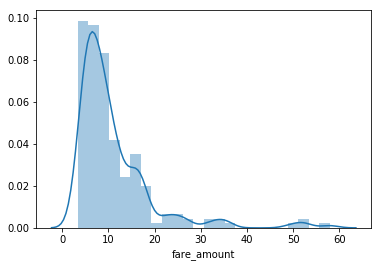

In [12]:
sns.distplot(train_df['fare_amount'])

#In distribution plot also it can be seen that there are some values which are negative fare

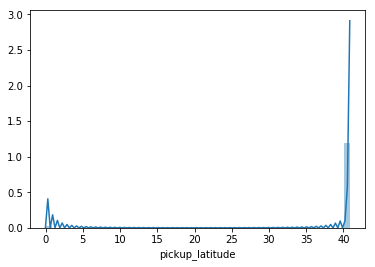

In [13]:
sns.distplot(train_df['pickup_latitude'])

#Here we can see minimum value is going to be less than even -3000 which is not correct value and also on positive side also going more than 2000

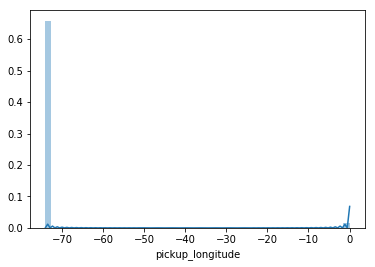

In [14]:
sns.distplot(train_df['pickup_longitude'])

#Here also negative and positive values are excedding far behond the real limit.

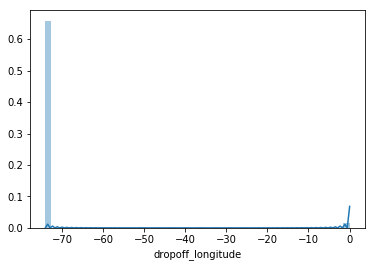

In [15]:
sns.distplot(train_df['dropoff_longitude'])

In [16]:
#Similarly here also same issue

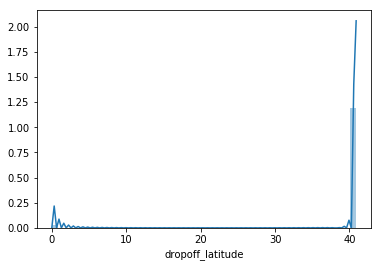

In [17]:
sns.distplot(train_df['dropoff_latitude'])

In [18]:
#here also we have noisy data as given value of dropoff_latitude and longitude are excedding

In [19]:
#lets look min and max value in test dataset of latitude and longitude

In [20]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


#we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york

In [21]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [22]:
#lets drop all the values which are not coming in above boundary, as those are noisy data

In [23]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (200, 8)
after droping (195, 8)


In [24]:
#lets remove all those rows where fare amount is negative

In [25]:
print("before droping", train_df.shape)
train_df=train_df[train_df['fare_amount']>0]
print("after droping", train_df.shape)

before droping (195, 8)
after droping (195, 8)


#On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [26]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [27]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [28]:
#here we can see that week are in monday , tuesday and so on. So we need convert them in numerical for

In [29]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 13 columns):
key                  195 non-null object
fare_amount          195 non-null float64
pickup_datetime      195 non-null datetime64[ns]
pickup_longitude     195 non-null float64
pickup_latitude      195 non-null float64
dropoff_longitude    195 non-null float64
dropoff_latitude     195 non-null float64
passenger_count      195 non-null int64
day                  195 non-null int64
hour                 195 non-null int64
weekday              195 non-null int64
month                195 non-null int64
year                 195 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 21.3+ KB


In [31]:
# we will keep only those rows where number of passangers are less than or equal to 8

In [32]:
train_df=train_df[train_df['passenger_count']<=8]

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 13 columns):
key                  195 non-null object
fare_amount          195 non-null float64
pickup_datetime      195 non-null datetime64[ns]
pickup_longitude     195 non-null float64
pickup_latitude      195 non-null float64
dropoff_longitude    195 non-null float64
dropoff_latitude     195 non-null float64
passenger_count      195 non-null int64
day                  195 non-null int64
hour                 195 non-null int64
weekday              195 non-null int64
month                195 non-null int64
year                 195 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 21.3+ KB


In [34]:
#here key column and pickup_datetime columns are not needed as we have already created variables extracted from it

In [35]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 199
Data columns (total 11 columns):
fare_amount          195 non-null float64
pickup_longitude     195 non-null float64
pickup_latitude      195 non-null float64
dropoff_longitude    195 non-null float64
dropoff_latitude     195 non-null float64
passenger_count      195 non-null int64
day                  195 non-null int64
hour                 195 non-null int64
weekday              195 non-null int64
month                195 non-null int64
year                 195 non-null int64
dtypes: float64(5), int64(6)
memory usage: 18.3 KB


#lets divide the data set into train and validation test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x=train_df.drop("fare_amount", axis=1)

In [39]:
y=train_df['fare_amount']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [41]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
83,-74.009728,40.705167,-73.970897,40.749307,1,8,21,1,7,2013
120,-73.972018,40.750142,-74.006008,40.736220,5,8,21,4,11,2012
174,-73.944023,40.775959,-73.955048,40.785080,1,27,7,5,2,2015
125,-73.971696,40.763378,-73.962035,40.776598,1,10,16,5,5,2013
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [42]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
42,-73.978450,40.762920,-74.008482,40.716502,1,22,8,5,11,2013
167,-73.954598,40.786760,-73.966013,40.768112,1,13,8,3,8,2014
64,-74.003919,40.753019,-73.992368,40.735362,1,7,10,1,11,2011
35,-73.983330,40.738720,-73.933197,40.847225,1,11,3,0,1,2015
127,-73.988492,40.717977,-73.978180,40.737407,1,6,21,1,1,2014


In [43]:
x_train.shape

(156, 10)

In [44]:
x_test.shape

(39, 10)

In [45]:
#Lets run the model.
#As we have to build regression model, lets start with linear regression model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
predictedvalues = lrmodel.predict(x_test)

In [49]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.802436637396736


In [50]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [51]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [52]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  7.666053053158853


In [53]:
#RandomForest Regressor is giving good value, so we can use it as final model

25